In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [327]:
url = "https://raw.githubusercontent.com/twiradinata/datasets/main/dts-itb03k02.csv"
dataset = pd.read_csv(url)
dataset.head()

,Kota,Usia (tahun),Jenis Kelamin,Tinggi Badan (dalam cm),Berat Badan (dalam kg),Kecepatan Bersepeda,Jenis Permukaan Jalan (yang paling sering dilalui),Jenis Sepeda (yang paling sering digunakan),Tujuan Bersepeda (secara singkat)
0,madiun,45,Pria,165,65,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike),olah raga
1,Pekalongan,50,Pria,166,80,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike),Menggerakkan badan ( olah raga) dalam jarak de...
2,Surabaya,43,Pria,178,73,Cepat (26 km/jam atau lebih),Jalanan Rata,Sepeda Balap (Road Bike),Kesehatan
3,Surabaya,40,Wanita,165,53,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike),berolahraga
4,surabaya,32,Wanita,155,68,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike),mengusir bosan


In [328]:
# Select appropriate columns
dataset = dataset[['Usia (tahun)', 'Jenis Kelamin', 'Tinggi Badan (dalam cm)', 'Berat Badan (dalam kg)', 'Kecepatan Bersepeda', 'Jenis Permukaan Jalan (yang paling sering dilalui)', 'Jenis Sepeda (yang paling sering digunakan)']]
dataset.head()

,Usia (tahun),Jenis Kelamin,Tinggi Badan (dalam cm),Berat Badan (dalam kg),Kecepatan Bersepeda,Jenis Permukaan Jalan (yang paling sering dilalui),Jenis Sepeda (yang paling sering digunakan)
0,45,Pria,165,65,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike)
1,50,Pria,166,80,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike)
2,43,Pria,178,73,Cepat (26 km/jam atau lebih),Jalanan Rata,Sepeda Balap (Road Bike)
3,40,Wanita,165,53,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Balap (Road Bike)
4,32,Wanita,155,68,Santai (15 km/jam atau kurang),Jalanan Rata,Sepeda Balap (Road Bike)


In [329]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Usia (tahun)                                        498 non-null    object
 1   Jenis Kelamin                                       498 non-null    object
 2   Tinggi Badan (dalam cm)                             498 non-null    object
 3   Berat Badan (dalam kg)                              498 non-null    object
 4   Kecepatan Bersepeda                                 498 non-null    object
 5   Jenis Permukaan Jalan (yang paling sering dilalui)  498 non-null    object
 6   Jenis Sepeda (yang paling sering digunakan)         498 non-null    object
dtypes: object(7)
memory usage: 27.4+ KB


In [330]:
dataset.describe()

,Usia (tahun),Jenis Kelamin,Tinggi Badan (dalam cm),Berat Badan (dalam kg),Kecepatan Bersepeda,Jenis Permukaan Jalan (yang paling sering dilalui),Jenis Sepeda (yang paling sering digunakan)
count,498,498,498,498,498,498,498
unique,95,2,55,81,3,2,3
top,40,Pria,165,65,Sedang (16 - 25 km/jam),Jalanan Rata,Sepeda Gunung (Mountain Bike/MTB)
freq,22,385,48,31,270,397,284


In [331]:
# Check null and missing data
missing = dataset.isnull().sum()
print("Missing:")
print(missing)

print()

zero = (dataset == 0).sum()
print("Zeros: ")
print(zero)

Missing:
Usia (tahun)                                          0
Jenis Kelamin                                         0
Tinggi Badan (dalam cm)                               0
Berat Badan (dalam kg)                                0
Kecepatan Bersepeda                                   0
Jenis Permukaan Jalan (yang paling sering dilalui)    0
Jenis Sepeda (yang paling sering digunakan)           0
dtype: int64

Zeros: 
Usia (tahun)                                          0
Jenis Kelamin                                         0
Tinggi Badan (dalam cm)                               0
Berat Badan (dalam kg)                                0
Kecepatan Bersepeda                                   0
Jenis Permukaan Jalan (yang paling sering dilalui)    0
Jenis Sepeda (yang paling sering digunakan)           0
dtype: int64


In [332]:
contains_strings = any(dataset['Usia (tahun)'].apply(lambda x: isinstance(x, str)))
print("Before adjustment: ", contains_strings)

# To adjust data which has the format "xxxx / xx tahun" by splitting from the paranthesis then getting the float value
dataset['Usia (tahun)'] = dataset['Usia (tahun)'].str.split('/').str[-1] 
dataset['Usia (tahun)'] = dataset['Usia (tahun)'].str.extract(r'(\d+)').astype(float)

# To adjust data which has the format "xx tahun" by removing the strings
dataset['Usia (tahun)'] = dataset['Usia (tahun)'].apply(lambda x: re.findall(r'\d+', str(x)))
dataset['Usia (tahun)'] = dataset['Usia (tahun)'].apply(lambda x: int(x[0]) if len(x) > 0 else None)

contains_strings = any(dataset['Usia (tahun)'].apply(lambda x: isinstance(x, str)))
print("After adjustment: ", contains_strings)


Before adjustment:  True
After adjustment:  False


In [333]:
contains_strings = any(dataset['Tinggi Badan (dalam cm)'].apply(lambda x: isinstance(x, str)))
print("Before adjustment: ", contains_strings)

# To adjust data which has the format "xx cm" by removing the strings
dataset['Tinggi Badan (dalam cm)'] = dataset['Tinggi Badan (dalam cm)'].apply(lambda x: re.findall(r'\d+', str(x)))
dataset['Tinggi Badan (dalam cm)'] = dataset['Tinggi Badan (dalam cm)'].apply(lambda x: int(x[0]) if len(x) > 0 else None)

contains_strings = any(dataset['Tinggi Badan (dalam cm)'].apply(lambda x: isinstance(x, str)))
print("After adjustment: ", contains_strings)

Before adjustment:  True
After adjustment:  False


In [334]:
contains_strings = any(dataset['Berat Badan (dalam kg)'].apply(lambda x: isinstance(x, str)))
print("Before adjustment: ", contains_strings)

# To adjust data which has the format "xx kg" by removing the strings
dataset['Berat Badan (dalam kg)'] = dataset['Berat Badan (dalam kg)'].apply(lambda x: re.findall(r'\d+', str(x)))
dataset['Berat Badan (dalam kg)'] = dataset['Berat Badan (dalam kg)'].apply(lambda x: int(x[0]) if len(x) > 0 else None)

contains_strings = any(dataset['Berat Badan (dalam kg)'].apply(lambda x: isinstance(x, str)))
print("After adjustment: ", contains_strings)

Before adjustment:  True
After adjustment:  False


In [335]:
# Encode data
encoder = LabelEncoder()

dataset['Jenis Kelamin'] = encoder.fit_transform(dataset['Jenis Kelamin'])
dataset['Kecepatan Bersepeda'] = encoder.fit_transform(dataset['Kecepatan Bersepeda'])
dataset['Jenis Permukaan Jalan (yang paling sering dilalui)'] = encoder.fit_transform(dataset['Jenis Permukaan Jalan (yang paling sering dilalui)'])
dataset['Jenis Sepeda (yang paling sering digunakan)'] = encoder.fit_transform(dataset['Jenis Sepeda (yang paling sering digunakan)'])

In [336]:
dataset.head()

,Usia (tahun),Jenis Kelamin,Tinggi Badan (dalam cm),Berat Badan (dalam kg),Kecepatan Bersepeda,Jenis Permukaan Jalan (yang paling sering dilalui),Jenis Sepeda (yang paling sering digunakan)
0,45,0,165,65,2,0,0
1,50,0,166,80,1,0,0
2,43,0,178,73,0,0,0
3,40,1,165,53,2,0,0
4,32,1,155,68,1,0,0


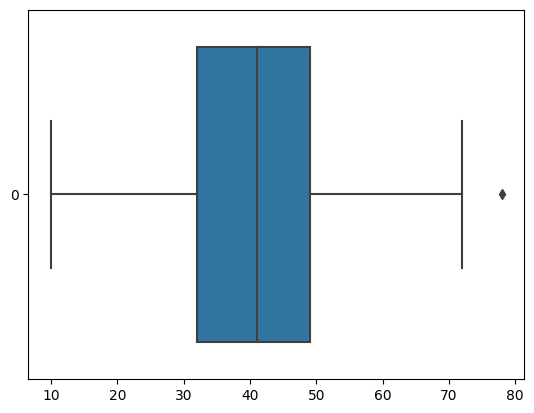

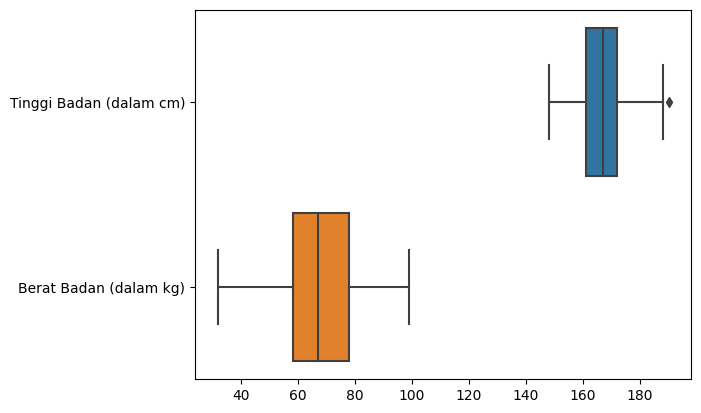

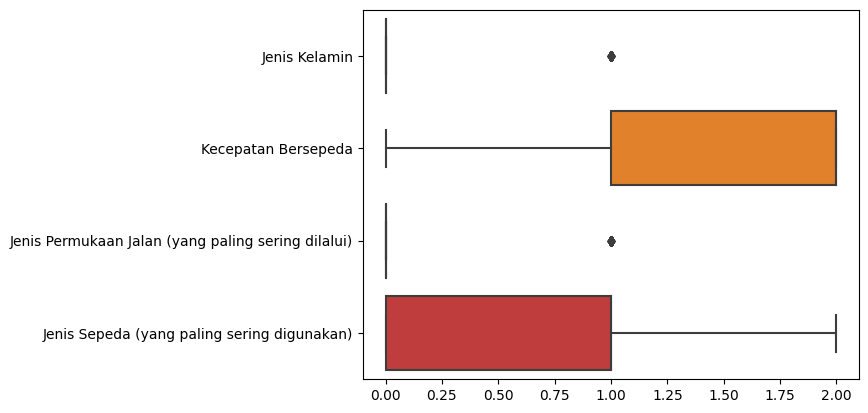

In [337]:
sns.boxplot(data=dataset['Usia (tahun)'], orient='h')
plt.show()

sns.boxplot(data=dataset[['Tinggi Badan (dalam cm)', 'Berat Badan (dalam kg)']], orient='h')
plt.show()

sns.boxplot(data=dataset[['Jenis Kelamin', 'Kecepatan Bersepeda', 'Jenis Permukaan Jalan (yang paling sering dilalui)', 'Jenis Sepeda (yang paling sering digunakan)']], orient='h')
plt.show()

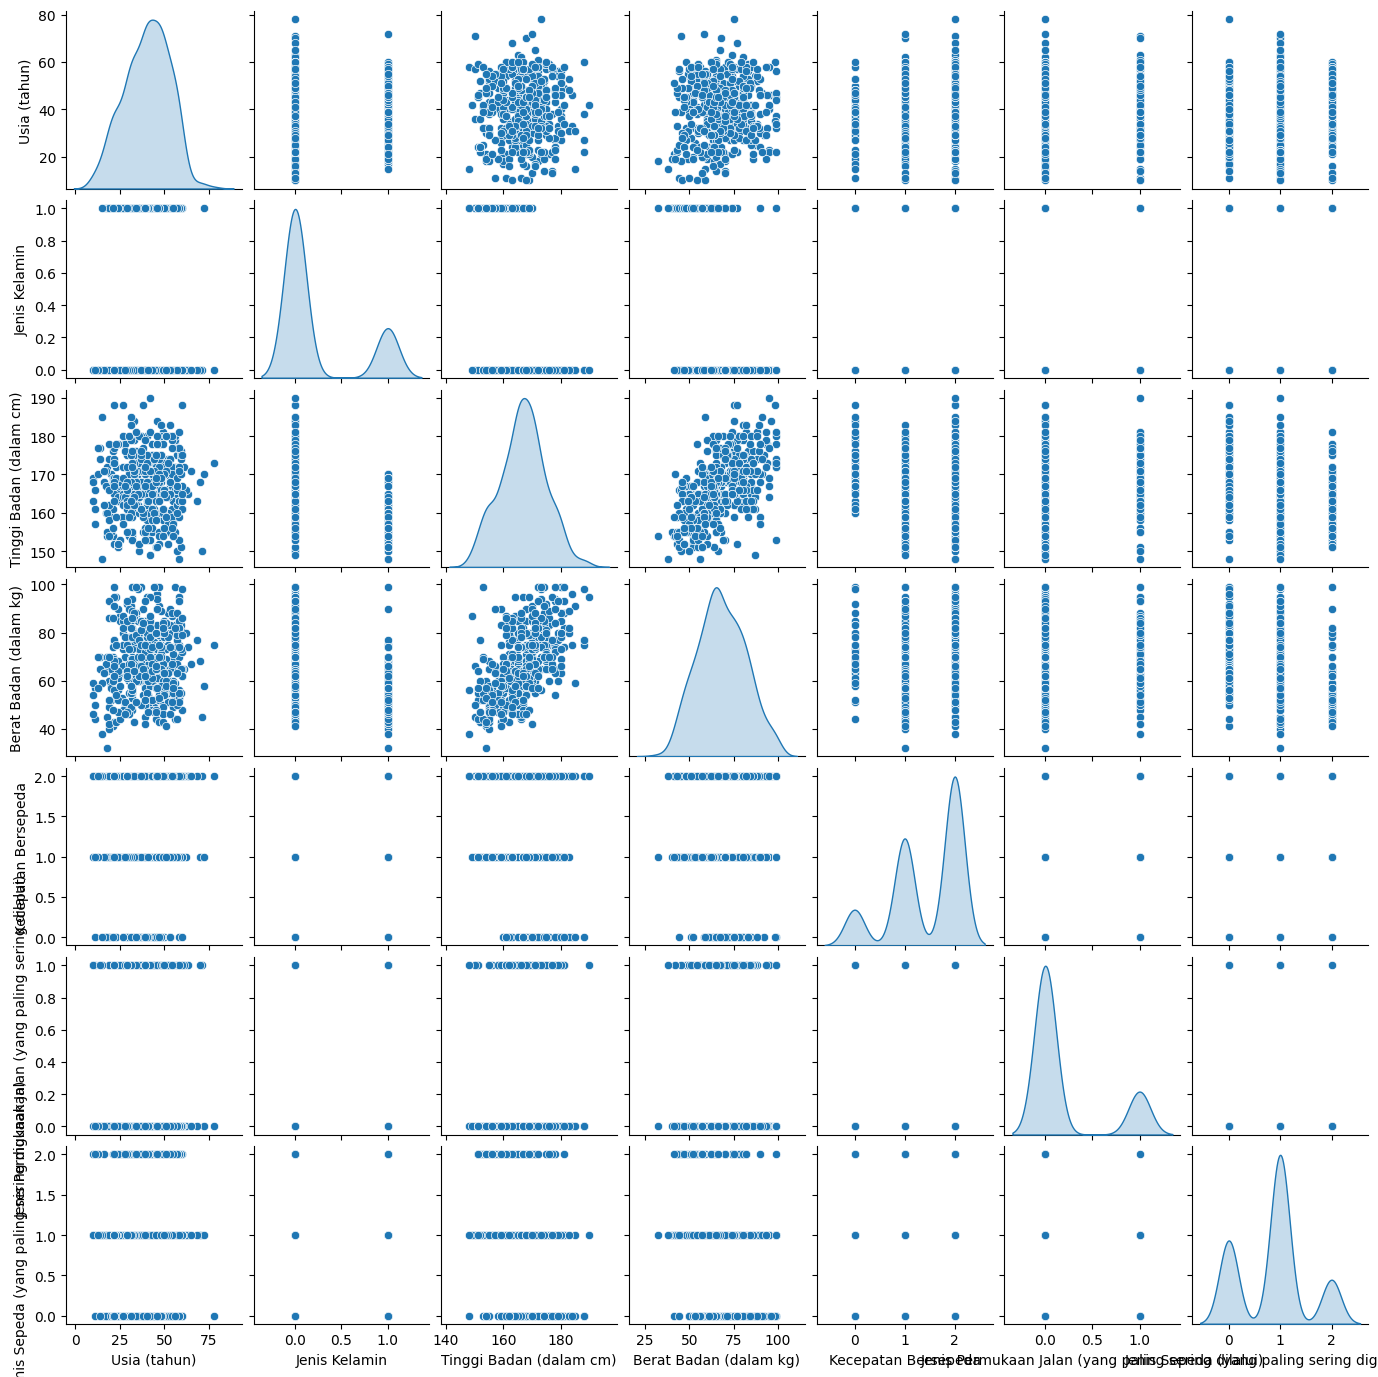

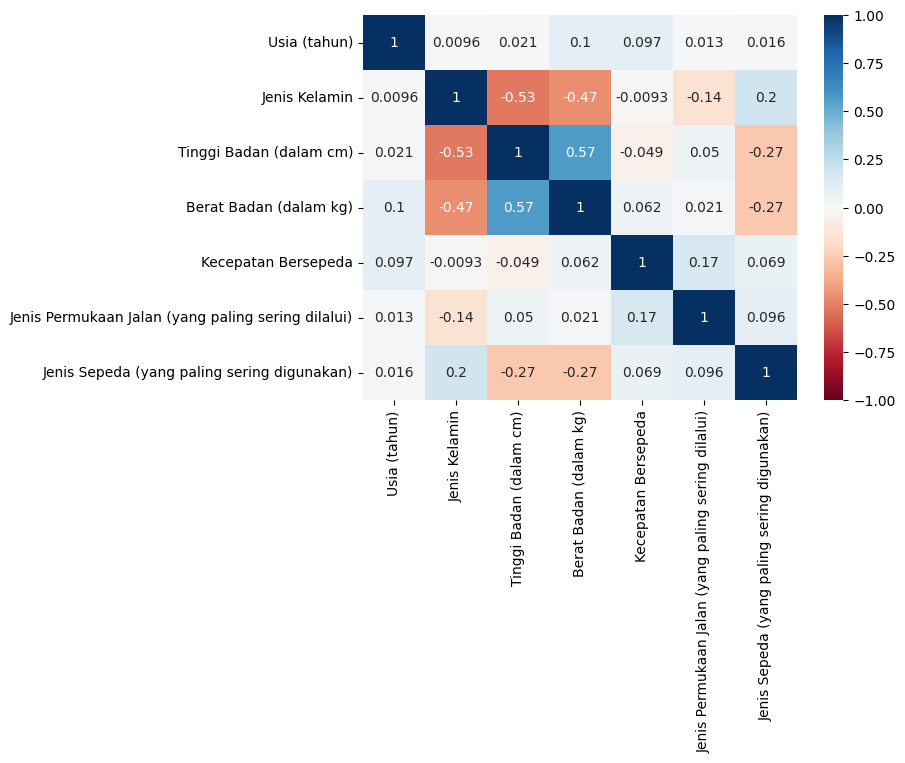

In [338]:
sns.pairplot(data=dataset, height=2, diag_kind='kde')
plt.show()

plt.subplots(figsize=(7,5))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

In [339]:
X = dataset.iloc[:, :-1].values

y = dataset.iloc[:, -1].values

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [349]:
classifier = LogisticRegression(max_iter=5000)

classifier.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [351]:
ageInput = 20
genderInput = pd.DataFrame({'Jenis Kelamin': ['Pria']})
heightInput = 175
weightInput = 67
speedInput = pd.DataFrame({'Jenis Kelamin': ['Cepat (26 km/jam atau lebih)']})
surfaceInput = pd.DataFrame({'Jenis Permukaan Jalan (yang paling sering dilalui)': ['Jalanan Rata']})

print(encoder.inverse_transform(classifier.predict([[20, 1, 175, 67, 3, 0]])))

['Sepeda Gunung (Mountain Bike/MTB)']
